$$\LARGE\textbf{Statistics for Artificial Intelligence and Data Science}$$

$$\Large\textbf{Analysis of Storks Data}$$

$$\Large\textbf{Daniel Elston}$$

$$\newline$$

$\Large\textbf{Contents:}$

**Notebook Outline**

**Section 1: Analysis 1**

> **1.1:** Data Load In

> **1.2:** Regression Model 1

> **1.3:** Regression Model 2

> **1.4:** Brief Explanation

> **1.5:** Bootstrap

> **1.6:** Resampled Regression Model 1

> **1.7:** Resampled Regression Model 2

> **1.8:** Difference in R2 Values

**Section 2: Analysis 2**

> **2.1:** Data Preparation

> **2.2:** Regression Model 1

> **2.3:** Regression Model 2

> **2.4:** Brief Explanation

> **2.5:** Bootstrap

> **2.6:** Resampled Regression Model 1

> **2.7:** Resampled Regression Model 2

> **2.8:** Difference in RMSE Values

**Conclusion**

$$\newline$$

$\Large\textbf{Notebook Outline}$

This notebook looks at the 'Storks' dataset. The correlation between the birth rate of humans and number of stork pairs is explored. Regression models are plotted to show the relationships between different predictor variables and their effects on the target variables. The datasets are run through a bootstrap to increase the reliability of results and plotted again. Difference in R2 and RMSE values are determined combined with confidence intervals to increase confidence on which models predict the target variable better.

$$\newline$$

$\Large\textbf{Section 1: Analysis 1}$

> **1.1:** Data Load In

> **1.2:** Regression Model 1

> **1.3:** Regression Model 2

> **1.4:** Brief Explanation

> **1.5:** Bootstrap

> **1.6:** Resampled Regression Model 1

> **1.7:** Resampled Regression Model 2

> **1.8:** Difference in R2 Values

Section 1 details the results of analysis 1. Regression models are fitted for the birth rate of humans against different predictor variables. The dataframe is resampled and run through a bootstrap to improve reliability of results further. The difference in R2 values is explored and a regression plot that better predicts the birth rate is determined.

$$\newline$$

$\large\textbf{1.1: Data Load In}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy.stats as sci
from scipy.stats import chisquare
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
%matplotlib inline

The storks dataset is loaded in

In [2]:
df = pd.read_csv('storks.csv')
df

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


$$\newline$$

$\large\textbf{1.2: Regression Model 1}$

The first regression model shows the target variable of the human birth rate against the predictor variable the number of stork pairs.

In [3]:
y_BR = df[['BirthRate']].to_numpy()   # this is the target variable; we assue just one though more are possible
X_storks = df[['Storks']].to_numpy()

In [4]:
reg_storks_BR = LinearRegression().fit(X_storks, y_BR)

In [5]:
y_hat_storks = reg_storks_BR.predict(X_storks)

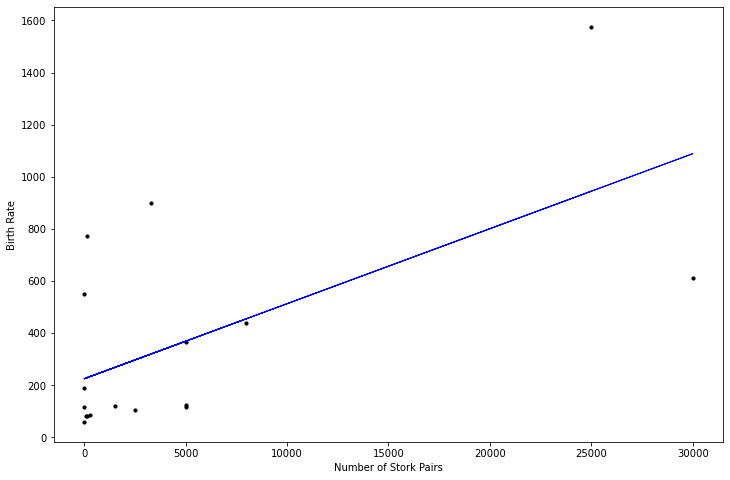

In [6]:
fig, a = plt.subplots(1,1,figsize=(12,8))
a.scatter(X_storks, y_BR,  color='black', alpha=1, s=10)
a.plot(X_storks, y_hat_storks, color='blue', linewidth=1)

a.set_xlabel('Number of Stork Pairs')
a.set_ylabel('Birth Rate')
plt.show()

In [7]:
print('The R2 coefficient of determination is %4.3f' % reg_storks_BR.score(X_storks, y_BR))
print('The intercept is %4.1f' % reg_storks_BR.intercept_)
beta_storks = reg_storks_BR.coef_
print('Estimated regression coefficient for Stork Population is %4.2f' % beta_storks, '')

The R2 coefficient of determination is 0.385
The intercept is 225.0
Estimated regression coefficient for Stork Population is 0.03 


$$\newline$$

$\large\textbf{1.3: Regression Model 2}$

The second regression model shows the target variable of the human birth rate against the predictor variable the number of humans.

In [8]:
y_BR = df[['BirthRate']].to_numpy()   # this is the target variable; we assue just one though more are possible
X_humans = df[['Humans']].to_numpy()

In [9]:
reg_humans_BR = LinearRegression().fit(X_humans, y_BR)

In [10]:
y_hat_humans = reg_humans_BR.predict(X_humans)

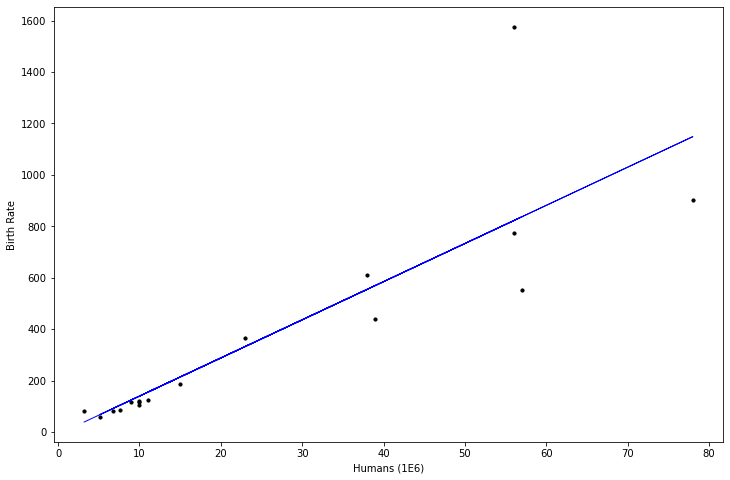

In [11]:
fig, a2 = plt.subplots(1,1,figsize=(12,8))
a2.scatter(X_humans, y_BR,  color='black', alpha=1, s=10)
a2.plot(X_humans, y_hat_humans, color='blue', linewidth=1)

a2.set_xlabel('Humans (1E6)')
a2.set_ylabel('Birth Rate')
plt.show()

In [12]:
print('The R2 coefficient of determination is %4.3f' % reg_humans_BR.score(X_humans, y_BR))
print('The intercept is %4.1f' % reg_humans_BR.intercept_)
beta_humans = reg_humans_BR.coef_
print('Estimated regression coefficient for Population Size is %4.2f' % beta_humans, '')

The R2 coefficient of determination is 0.725
The intercept is -8.4
Estimated regression coefficient for Population Size is 14.83 


$$\newline$$

$\large\textbf{1.4: Brief Explanation}$

The above plots show a positive correlation between the birth rate of humans, and the number of humans or stalks. The R2 coefficient of the storks plot of 0.385 suggests the regression line is not fitted well to the data. However the humans R2 coefficient of 0.725 shows the data is fitted to the regression line quite well.

$$\newline$$

$\large\textbf{1.5: Bootstrap}$

A bootstrap is set up to resample the data, repeating n times.

In [13]:
def bootstrap(data, repeats):
    
    # Input chosen data
    result = pd.DataFrame(data)
    
    # Resample input data X times, default is to resample same size 
    for i in range(0, repeats):
        result = resample(data)
    return result

For each resampled dataframe, the below function is applied to them.

In [14]:
def regression_boot(df_boot):
    
    # Column values of sampled dataframes (storks and humans)
    y_rep = df_boot[['BirthRate']].to_numpy() 
    X_rep = df_boot[['Storks']].to_numpy()
    X_2_rep = df_boot[['Humans']].to_numpy()
    
    # Linear regression of sampled dataframes
    reg_R2_storks = LinearRegression().fit(X_rep, y_rep)
    reg_R2_humans = LinearRegression().fit(X_2_rep, y_rep)
    
    # Regression values for sampled dataframe
    v1 = reg_R2_storks.score(X_rep, y_rep)
    v2 = reg_R2_humans.score(X_2_rep, y_rep)
    
    # R2 value difference between two above regressions
    R2_diff = v2-v1
    
    return R2_diff

The new resampled dataframe is shown below

In [15]:
df_boot = bootstrap(df, 100)
df_boot

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
15,Switzerland,41290,150,6.7,82,43.19
11,Poland,312680,30000,38.0,610,64.09
12,Portugal,92390,1500,10.0,120,52.51
6,Germany,357000,3300,78.0,901,59.81
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86
8,Holland,41900,4,15.0,188,70.96
12,Portugal,92390,1500,10.0,120,52.51
12,Portugal,92390,1500,10.0,120,52.51
10,Italy,301280,5,57.0,551,60.30


$$\newline$$

$\large\textbf{1.6: Resampled Regression Model 1}$

The regression model from section 1.2 is re-plotted with a resampled dataframe

In [16]:
y_BR_boot = df_boot[['BirthRate']].to_numpy()
X_storks_boot = df_boot[['Storks']].to_numpy()
X_humans_boot = df_boot[['Humans']].to_numpy()

In [17]:
reg_boot_storks = LinearRegression().fit(X_storks_boot, y_BR_boot)

In [18]:
y_hat_boot_storks = reg_boot_storks.predict(X_storks_boot)

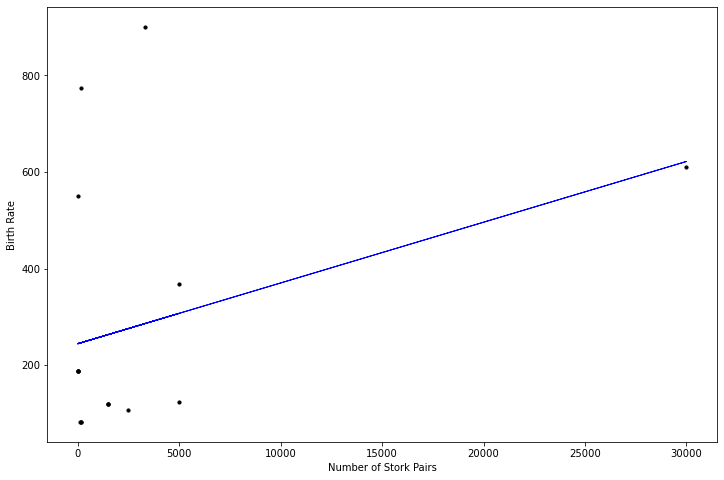

In [19]:
fig, a3 = plt.subplots(1,1,figsize=(12,8))
a3.scatter(X_storks_boot, y_BR_boot,  color='black', alpha=1, s=10)
a3.plot(X_storks_boot, y_hat_boot_storks, color='blue', linewidth=1)

a3.set_xlabel('Number of Stork Pairs')
a3.set_ylabel('Birth Rate')
plt.show()

In [20]:
print('The R2 coefficient of determination is %4.3f' % reg_boot_storks.score(X_storks_boot, y_BR_boot))
print('The intercept is %4.1f' % reg_boot_storks.intercept_)
beta_boot_storks = reg_boot_storks.coef_
print('Estimated regression coefficient for Population Size is %4.2f' % beta_boot_storks, '')

The R2 coefficient of determination is 0.118
The intercept is 244.2
Estimated regression coefficient for Population Size is 0.01 


$$\newline$$

$\large\textbf{1.7: Resampled Regression Model 2}$

The regression model from section 1.3 is re-plotted with a resampled dataframe

In [21]:
reg_boot_humans = LinearRegression().fit(X_humans_boot, y_BR_boot)

In [22]:
y_hat_boot_humans = reg_boot_humans.predict(X_humans_boot)

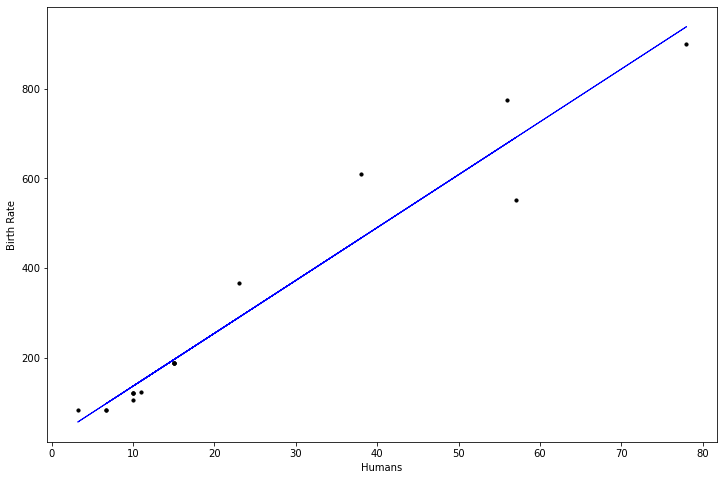

In [23]:
fig, a4 = plt.subplots(1,1,figsize=(12,8))
a4.scatter(X_humans_boot, y_BR_boot,  color='black', alpha=1, s=10)
a4.plot(X_humans_boot, y_hat_boot_humans, color='blue', linewidth=1)

a4.set_xlabel('Humans')
a4.set_ylabel('Birth Rate')
plt.show()

In [24]:
print('The R2 coefficient of determination is %4.3f' % reg_boot_humans.score(X_humans_boot, y_BR_boot))
print('The intercept is %4.1f' % reg_boot_humans.intercept_)
beta_boot_humans = reg_boot_humans.coef_
print('Estimated regression coefficient for Population Size is %4.2f' % beta_boot_humans, '')

The R2 coefficient of determination is 0.945
The intercept is 18.5
Estimated regression coefficient for Population Size is 11.80 


$$\newline$$

$\large\textbf{1.8: Difference in R2 Values}$

The regression models are plotted numerous times, their R2 values determined and their differences are found. The below for loop determines the R2 difference for each resampled dataframes regression 1 and 2.

In [25]:
data_store = []

for i in range(500):
    
    # Bootstrap dataframes
    df_boot = bootstrap(df, 100)
    
    # Run bootstrap through regression bootstrap function
    reg_boot = regression_boot(df_boot).round(3)
    data_store.append([reg_boot])

In [26]:
df_reg = pd.DataFrame(data_store, columns=['R2_Difference'])
df_reg

,R2_Difference
0,0.874
1,0.302
2,0.728
3,0.274
4,0.188
...,...
495,0.215
496,0.075
497,0.100
498,0.272


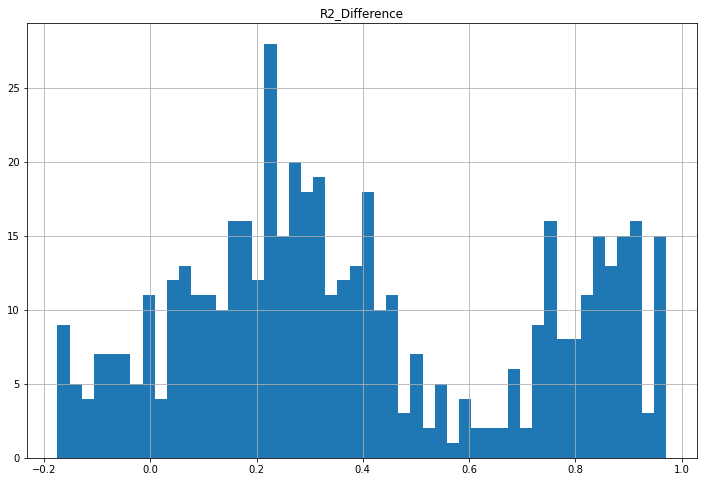

In [27]:
fig = plt.figure(figsize = (12,8))
ax1=fig.gca()

df_reg.hist(ax=ax1, bins=50)

plt.show()

In [28]:
print("R2 coefficient mean is %4.3f, with 95%% range is %4.3f to %4.3f" %
      (df_reg.mean(), df_reg['R2_Difference'].quantile(0.05), df_reg['R2_Difference'].quantile(0.95)))

R2 coefficient mean is 0.392, with 95% range is -0.083 to 0.914


The above histogram shows the difference in the R2 values between the storks and humans plot. Taking the R2 value of the storks plot away from the R2 value of the humans plot results in a greater R2 difference, suggesting that the humans plot more of the variability than the storks model. The confidence intervals further confirm our confidence in this conclusion. The confidence interval is quite unstable, having a large range of close to 1. This suggests that the . This suggests the estimate is stable/

$$\newline$$

$\Large\textbf{Section 2: Analysis 2}$

> **2.1:** Data Preparation

> **2.2:** Regression Model 1

> **2.3:** Regression Model 2

> **2.4:** Brief Explanation

> **2.5:** Bootstrap

> **2.6:** Resampled Regression Model 1

> **2.7:** Resampled Regression Model 2

> **2.8:** Difference in RMSE Values

Section 2 details the results of analysis 2. Regression models are fitted for the number of stork pairs against different predictor variables. The dataframe is resampled and run through a bootstrap to improve reliability of results further. The difference in RMSE values is explored and a regression plot that better predicts the number of stork pairs is determined.

$$\newline$$

$\large\textbf{2.1: Data Preparation}$

The data is prepared for analysis 2. The population density is determined by dividing the number of humans by the area. Then, the suitable area percentage is used to determine the suitable area of land available to storks.

In [29]:
pop = ((df['Humans']*1000000)/df['Area']).round(1)

In [30]:
suit = ((df['SuitableAreaPercent']/100)*(df['Area']))

In [31]:
df2 = df.assign(PopDensity = pop, SuitableArea = suit)
df2

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent,PopDensity,SuitableArea
0,Albania,28750,100,3.2,83,55.68,111.3,16008.000
1,Austria,83860,300,7.6,87,38.34,90.6,32151.924
2,Belgium,30520,1,9.9,118,65.93,324.4,20121.836
3,Bulgaria,111000,5000,9.0,117,57.99,81.1,64368.900
4,Denmark,43100,9,5.1,59,81.46,118.3,35109.260
5,France,544000,140,56.0,774,58.47,102.9,318076.800
6,Germany,357000,3300,78.0,901,59.81,218.5,213521.700
7,Greece,132000,2500,10.0,106,47.31,75.8,62449.200
8,Holland,41900,4,15.0,188,70.96,358.0,29732.240
9,Hungary,93000,5000,11.0,124,75.86,118.3,70549.800


$$\newline$$

$\large\textbf{2.2: Regression Model 1}$

The regression model for how the area effects the number of stork pairs is plotted.

In [32]:
y_S = df2[['Storks']].to_numpy()
X_area = df2[['Area']].to_numpy()
X_suit_area = df2[['SuitableArea']].to_numpy()
X_land_area = df2[['PopDensity']].to_numpy()
X_la = df2[['SuitableArea', 'PopDensity']].to_numpy()

In [33]:
reg_area_S = LinearRegression().fit(X_area, y_S)

In [34]:
y_hat_area = reg_area_S.predict(X_area)

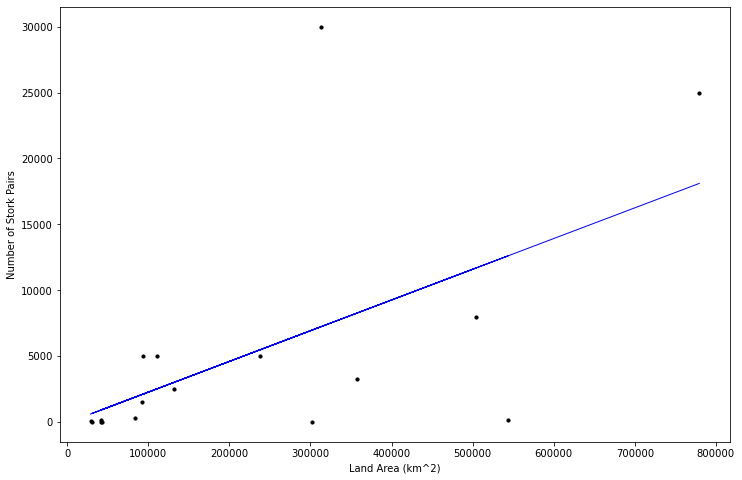

In [35]:
fig, a5 = plt.subplots(1,1,figsize=(12,8))
a5.scatter(X_area, y_S,  color='black', alpha=1, s=10)
a5.plot(X_area, y_hat_area, color='blue', linewidth=1)

a5.set_xlabel('Land Area (km^2)')
a5.set_ylabel('Number of Stork Pairs')
plt.show()

In [36]:
print('The R2 coefficient of determination is %4.3f' % reg_area_S.score(X_area, y_S))
print('The intercept is %4.1f' % reg_area_S.intercept_)
beta_area = reg_area_S.coef_
print('Estimated regression coefficient for Population Size is %4.2f' % beta_area, '')
print('Root of the mean squared error: %.2f'% mean_squared_error(y_hat_area, y_S, squared=False))

The R2 coefficient of determination is 0.336
The intercept is -60.7
Estimated regression coefficient for Population Size is 0.02 
Root of the mean squared error: 6984.77


$$\newline$$

$\large\textbf{2.3: Regression Model 2}$

The regression model for how the predictor variables suitable area and population density effect the number of stork pairs is plotted.

In [37]:
reg_la_S = LinearRegression().fit(X_la, y_S)

In [38]:
y_hat_la = reg_la_S.predict(X_la)

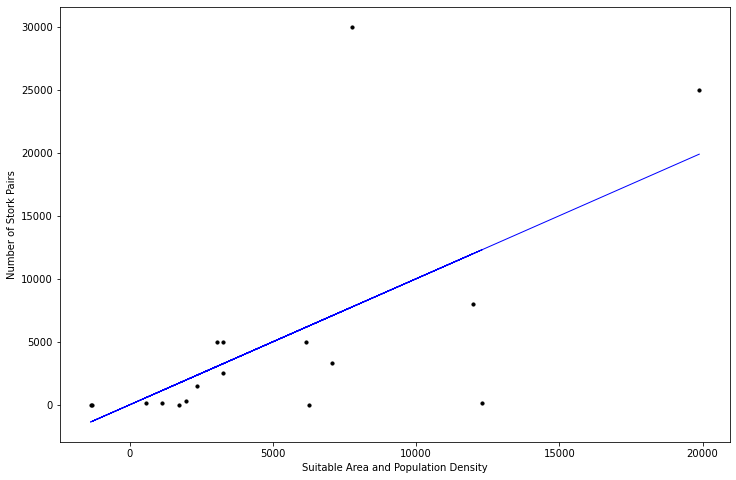

In [39]:
fig, a6 = plt.subplots(1,1,figsize=(12,8))
a6.scatter(y_hat_la, y_S,  color='black', alpha=1, s=10)
a6.plot(y_hat_la, y_hat_la, color='blue', linewidth=1)

a6.set_xlabel('Suitable Area and Population Density')
a6.set_ylabel('Number of Stork Pairs')
plt.show()

In [40]:
print('The R2 coefficient of determination is %4.3f' % reg_la_S.score(X_la, y_S))
print('The intercept is %4.1f' % reg_la_S.intercept_)
print('Root of the mean squared error: %.2f'% mean_squared_error(y_hat_la, y_S, squared=False))

The R2 coefficient of determination is 0.393
The intercept is 1882.0
Root of the mean squared error: 6676.99


$$\newline$$

$\large\textbf{2.4: Brief Description}$

Both models have a approximately the same R2 coefficient and RMSE values. The second plot has slightly lower RMSE and a slightly higher R2 coefficient of determination, suggesting the regression plot is fitted better.

$$\newline$$

$\large\textbf{2.5: Bootstrap}$

A bootstrap is used to create a resampled dataframe, then run the dataframe to get the regression models and RMSE values.

In [41]:
def bootstrap_2(data, repeats):
    
    # Input chosen data
    result = pd.DataFrame(data)
    
    # Resample input data X times, default is to resample same size 
    for i in range(0, repeats):
        result = resample(data)
    return result

In [42]:
def regression_boot_2(df_boot_2):
    
    # Column values of sampled dataframes (storks and humans)
    y_S_rep = df_boot_2[['Storks']].to_numpy()
    X_area_rep = df_boot_2[['Area']].to_numpy()
    X_la_rep = df_boot_2[['SuitableArea', 'PopDensity']].to_numpy()
    
    reg_area_S_boot = LinearRegression().fit(X_area_rep, y_S_rep)
    reg_la_S_boot = LinearRegression().fit(X_la_rep, y_S_rep)
    
    y_hat_area_boot = reg_area_S_boot.predict(X_area_rep)
    y_hat_la_boot = reg_la_S_boot.predict(X_la_rep)
    
    #RMSE
    RMSE1 = mean_squared_error(y_hat_area_boot, y_S_rep, squared=False)
    RMSE2 = mean_squared_error(y_hat_la_boot, y_S_rep, squared=False)
    
    # R2 value difference between two above regressions
    RMSE_diff = RMSE1-RMSE2
    
    return RMSE_diff

The resampled dataframe is shown below

In [43]:
df2_boot = bootstrap_2(df2, 100)
df2_boot

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent,PopDensity,SuitableArea
9,Hungary,93000,5000,11.0,124,75.86,118.3,70549.800
9,Hungary,93000,5000,11.0,124,75.86,118.3,70549.800
15,Switzerland,41290,150,6.7,82,43.19,162.3,17833.151
4,Denmark,43100,9,5.1,59,81.46,118.3,35109.260
1,Austria,83860,300,7.6,87,38.34,90.6,32151.924
2,Belgium,30520,1,9.9,118,65.93,324.4,20121.836
3,Bulgaria,111000,5000,9.0,117,57.99,81.1,64368.900
3,Bulgaria,111000,5000,9.0,117,57.99,81.1,64368.900
7,Greece,132000,2500,10.0,106,47.31,75.8,62449.200
4,Denmark,43100,9,5.1,59,81.46,118.3,35109.260


$$\newline$$

$\large\textbf{2.6: Resampled Regression Model 1}$

The regression model from section 2.2 is re-plotted with a resampled dataframe

In [44]:
y_S_boot = df2_boot[['Storks']].to_numpy()  
X_area_boot = df2_boot[['Area']].to_numpy()
X_suit_area_boot = df2_boot[['SuitableAreaPercent']].to_numpy()
X_land_area_boot = df2_boot[['PopDensity']].to_numpy()
X_la_boot = df2_boot[['SuitableAreaPercent', 'PopDensity']].to_numpy()

In [45]:
reg_area_S_boot = LinearRegression().fit(X_area_boot, y_S_boot)

In [46]:
y_hat_area_boot = reg_area_S_boot.predict(X_area_boot)

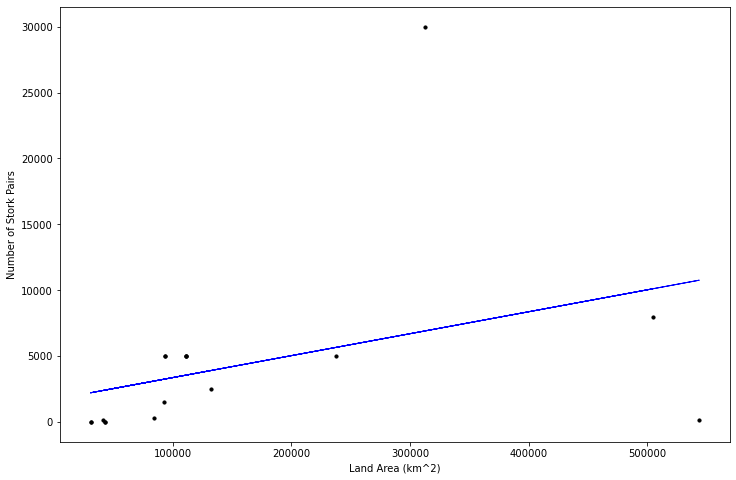

In [47]:
# Resampled regression

fig, a5 = plt.subplots(1,1,figsize=(12,8))
a5.scatter(X_area_boot, y_S_boot,  color='black', alpha=1, s=10)
a5.plot(X_area_boot, y_hat_area_boot, color='blue', linewidth=1)

a5.set_xlabel('Land Area (km^2)')
a5.set_ylabel('Number of Stork Pairs')
plt.show()

In [48]:
print('The R2 coefficient of determination is %4.3f' % reg_area_S_boot.score(X_area_boot, y_S_boot))
print('The intercept is %4.1f' % reg_area_S_boot.intercept_)
beta_area_boot = reg_area_S_boot.coef_
print('Estimated regression coefficient for Population Size is %4.2f' % beta_area_boot, '')
print('Root of the mean squared error: %.2f'% mean_squared_error(y_hat_area_boot, y_S_boot, squared=False))

The R2 coefficient of determination is 0.135
The intercept is 1712.0
Estimated regression coefficient for Population Size is 0.02 
Root of the mean squared error: 6428.43


$$\newline$$

$\large\textbf{2.7: Resampled Regression Model 2}$

The regression model from section 2.3 is re-plotted with a resampled dataframe

In [49]:
reg_la_S_boot = LinearRegression().fit(X_la_boot, y_S_boot)

In [50]:
y_hat_la_boot = reg_la_S_boot.predict(X_la_boot)

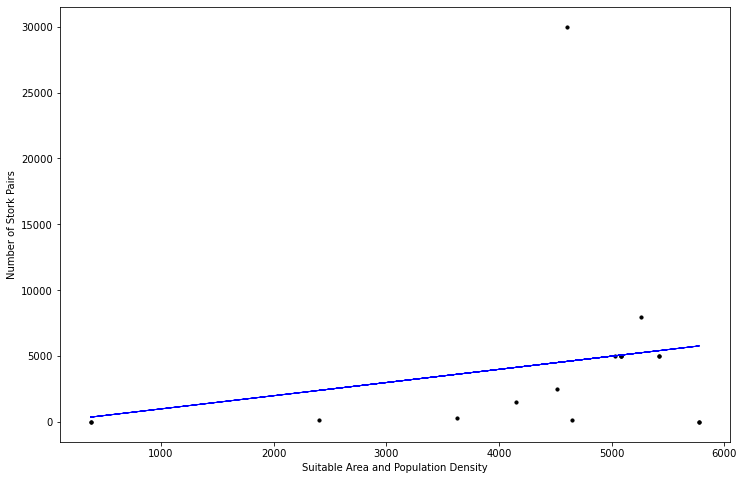

In [51]:
# Resampled regression

fig, a6 = plt.subplots(1,1,figsize=(12,8))
a6.scatter(y_hat_la_boot, y_S_boot,  color='black', alpha=1, s=10)
a6.plot(y_hat_la_boot, y_hat_la_boot, color='blue', linewidth=1)

a6.set_xlabel('Suitable Area and Population Density')
a6.set_ylabel('Number of Stork Pairs')
plt.show()

In [52]:
print('The R2 coefficient of determination is %4.3f' % reg_la_S_boot.score(X_la_boot, y_S_boot))
print('The intercept is %4.1f' % reg_la_S_boot.intercept_)
print('Root of the mean squared error: %.2f'% mean_squared_error(y_hat_la_boot, y_S_boot, squared=False))

The R2 coefficient of determination is 0.056
The intercept is 3128.3
Root of the mean squared error: 6717.77


$$\newline$$

$\large\textbf{2.8: Difference in RMSE Values}$

The regression models are plotted numerous times, their RMSE values determined and their differences are found. 

In [53]:
data_store_2 = []

for i in range(500):
    
    # Bootstrap dataframes
    df_boot_2 = bootstrap_2(df2, 100)
    
    # Run bootstrap through regression bootstrap function
    reg_boot_2 = regression_boot_2(df_boot_2).round(2)
    data_store_2.append([reg_boot_2])

In [54]:
df_reg_2 = pd.DataFrame(data_store_2, columns=['RMSE_Difference'])
df_reg_2

,RMSE_Difference
0,256.16
1,481.10
2,196.22
3,211.12
4,189.32
...,...
495,93.31
496,410.88
497,755.07
498,711.22


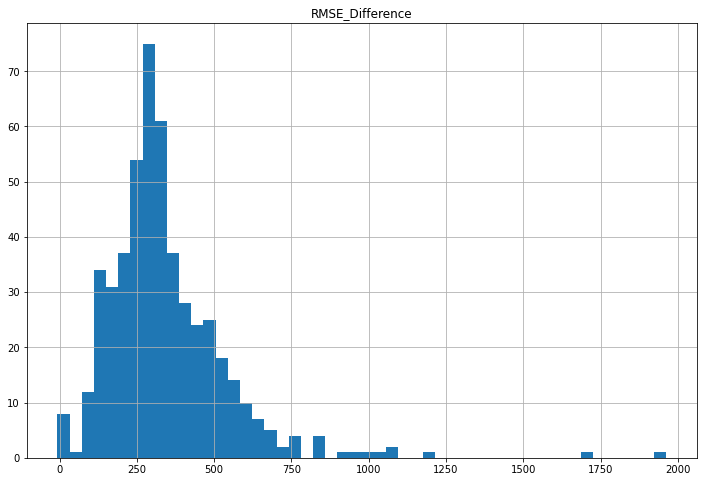

In [55]:
fig = plt.figure(figsize = (12,8))
ax2=fig.gca()

df_reg_2.hist(ax=ax2, bins=50)

plt.show()

In [56]:
print("RMSE mean is %4.1f, with 95%% range is %4.1f to %4.1f" %
      (df_reg_2.mean(), df_reg_2['RMSE_Difference'].quantile(0.05), df_reg_2['RMSE_Difference'].quantile(0.95)))

RMSE mean is 342.9, with 95% range is 118.4 to 659.3


The above histogram shows the difference in the RMSE values between the land area plot and suitable area and population density plot. Taking the RMSE value of the land area plot away from the RMSE value of the suitable area and population density plot results in a greater RMSE difference, suggesting that the land area plot more of the variability than the other model. The confidence intervals further confirm our confidence in this conclusion. The confidence interval is fairly stable considering the number of repeats. This suggests the estimate is stable/

$$\newline$$

$\large\textbf{Conclusion}$

A boostrap model was applied to the original dataframe to produce repeated, resampled data. The resampled data was analysed with regression models and their metrics such as R2 values and RMSE were noted in a new dataframe. The difference in each regression models R2/RMSE were then used to determine which model best plotted the variability of the data.

Analysis 1 seen that regression model 2 plotted more of the variability than the other model. This result found that the number of humans were a far better predictor than number of stork pairs for the birth rate of humans. This would agree with common sense and was expected.

Analysis 2 found that regression model 1 plotted more of the variability than the other model. This result found that land area was a better predictor than suitable area and population density combined, for the number of stork pairs. This can be accepted as we would expect human population density to have less of an effect on stork pair numbers than land area.

$$\newline$$